In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

In [2]:
NOMI = np.array(["indice", "csi", "theta", "theta_p", "g_0", "f_0"])
ORDINE = {nome: i for i,nome in enumerate(NOMI)}
ESPONENTI_DA_ANALIZZARE = np.array([0,1,2,3,4,5,6])

In [3]:
TABELLA = [ Table.read(f'build/Lane-Emden_RK_n={i}.dat', names = NOMI,  format="ascii") for i in ESPONENTI_DA_ANALIZZARE]
DATI = np.array( [ np.array([ table[nome] for nome in NOMI ]).T for table in TABELLA] )

In [4]:
INDICI = np.array([data[:, ORDINE["indice"] ] for data in DATI])
CSIS = np.array([data[:, ORDINE["csi"] ] for data in DATI])
THETAS = np.array([data[:, ORDINE["theta"] ] for data in DATI])

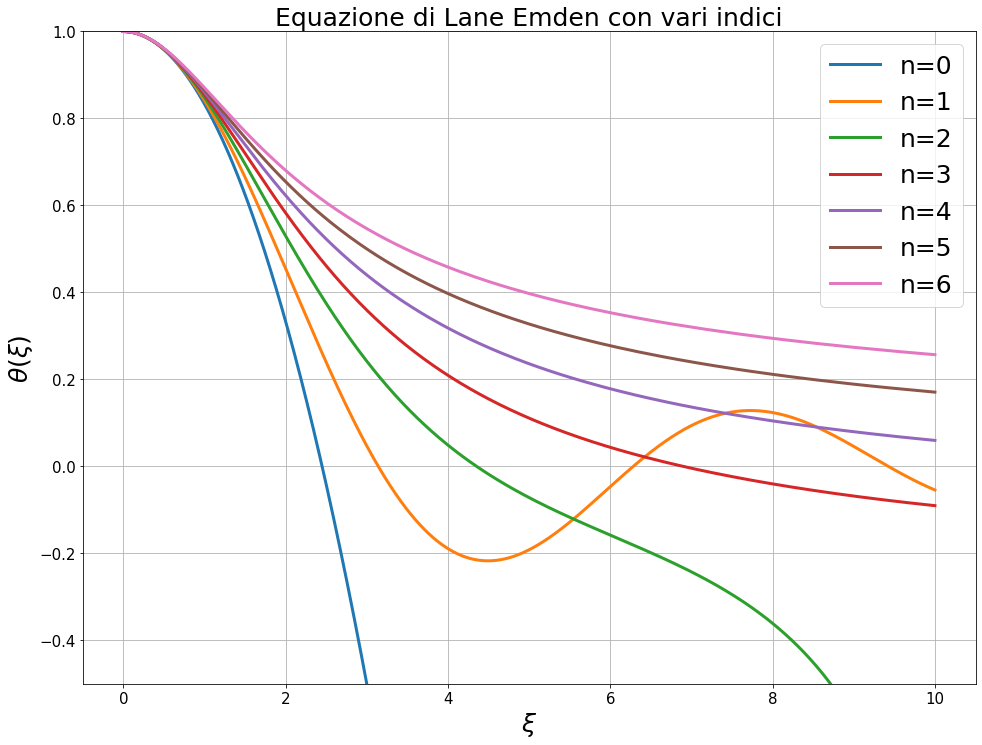

In [5]:
SIZE_ticks = 15
SIZE_labels = 25

fig = plt.figure(figsize=(16,12))
for i,n in enumerate(ESPONENTI_DA_ANALIZZARE):
    plt.plot(CSIS[i], THETAS[i], '-', lw=3,label = f"n={n}")
    
plt.grid()
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.title("Equazione di Lane Emden con vari indici", size=SIZE_labels)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylim(-0.5,1)
plt.ylabel(r'$\theta(\xi)$', size=SIZE_labels)
plt.legend(prop={"size":25});